credit fraud detection using SKLearnlibraries and visualizing using matplotlib

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

 Now we are loading the data  


In [ ]:
data =pd.read_csv("creditcard.csv")

I am  reading the data 

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,-0.287880,0.803504,-1.387375,0.889951,0.729020,-0.135403,-0.033405,0.360732,-0.022175,-0.082943,0.031135,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,1.263167,1.200059,1.574790,1.181378,1.358061,0.979347,0.971423,1.268198,0.855653,0.825932,0.617084,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,-14.166795,-2.767470,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.276034,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,-0.744874,-0.007598,-2.403243,0.045664,0.122064,-0.702791,-0.510461,-0.116974,-0.459945,-0.568901,-0.160833,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,-0.352155,0.753609,-1.707884,0.952180,0.984915,-0.001974,0.044005,0.361666,0.026846,-0.087679,-0.034371,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,0.154114,1.594331,-0.043952,1.778463,1.511918,0.528986,0.537823,0.851845,0.479125,0.433110,0.145070,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,12.701539,12.018913,3.774837,4.465413,7.692209,3.635042,4.816252,9.253526,4.295648,4.555359,13.849860,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
15931,27369,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,-0.259295,-0.334931,0.034301,0.180830,0.304219,0.617653,-0.165891,-0.164087,-0.579506,0.310690,-0.209708,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,52.90,0.0
15932,27369,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,-1.059102,-0.093860,0.140422,-0.174732,-1.876136,1.068378,1.614986,3.794014,1.704158,-0.606898,-0.049105,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,99.99,0.0
15933,27369,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,-0.771700,-0.786274,-0.631577,-0.939768,0.056832,0.817539,0.872867,-0.790431,0.254751,-0.956994,-0.006012,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,74.58,0.0
15934,27370,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,1.430341,-1.293415,-1.878013,-0.753629,-0.229368,1.312745,-0.130226,0.431252,0.309580,-0.472422,-0.431134,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,6.00,0.0
15935,27371,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,0.612630,-1.458078,-1.176940,-0.012917,0.074091,0.667685,1.369402,-0.118717,-1.398645,1.303147,0.234881,-0.255944,-1.055682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#we used pie chart because our data class has more variables to suit histogram 

Class as pie chart:


Text(0, 0.5, '')

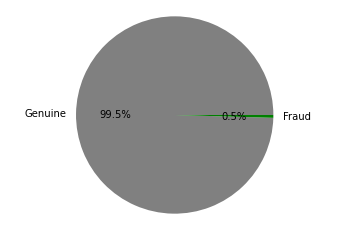

In [86]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['grey','g'])
plt.axis('equal')
plt.ylabel('')

we visualize our Transactions  vs Time (checking how long it takes for a client to make a transactions)

Time variable
15931    7.602500
15932    7.602500
15933    7.602500
15934    7.602778
15935    7.603056
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

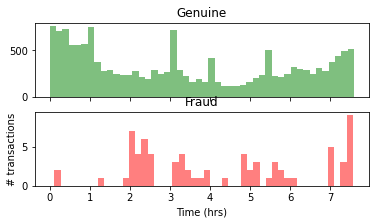

In [ ]:
#plot Time to see if there is any trend
print("Time variable")
data["Time_Hr"] = data["Time"]/3600 # convert to hours
print(data["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

I will Drop the time column but keep the time in Time in Hr

In [87]:
data["scaled_Amount"] = data["scaled_Amount"].fillna(0)
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Time_Hr,scaled_Amount,"(V24, V25, V26, V27, V28)"
15931,-1.160116,-0.244177,0.744250,-0.192350,1.156356,-1.931383,0.409670,-0.364716,-0.516156,-0.259295,-0.334931,0.034301,0.180830,0.304219,0.617653,-0.165891,-0.164087,-0.579506,0.310690,-0.209708,-0.021714,0.012447,-0.360625,0.514926,0.064194,1.026317,-0.030845,-0.083609,0.0,7.602500,-0.071245,-0.360625
15932,-3.058318,3.099206,-4.932555,1.924138,-1.576032,-2.135383,-0.830098,2.228617,-0.312343,-1.059102,-0.093860,0.140422,-0.174732,-1.876136,1.068378,1.614986,3.794014,1.704158,-0.606898,-0.049105,-0.111526,-0.485223,-0.003945,0.049422,-0.173962,-0.379260,0.171872,-0.236166,0.0,7.602500,0.177449,-0.003945
15933,-0.661806,0.315385,2.011194,-0.438757,-0.554990,-0.668072,0.424651,0.079141,0.126057,-0.771700,-0.786274,-0.631577,-0.939768,0.056832,0.817539,0.872867,-0.790431,0.254751,-0.956994,-0.006012,0.148063,0.177511,0.134794,0.359931,-0.544428,0.181545,0.068546,0.153438,0.0,7.602500,0.043252,0.134794
15934,1.525348,-1.231442,0.420095,-1.551218,-1.376006,0.100758,-1.455755,0.134876,-1.319056,1.430341,-1.293415,-1.878013,-0.753629,-0.229368,1.312745,-0.130226,0.431252,0.309580,-0.472422,-0.431134,-0.108619,0.084883,-0.051758,-0.815038,0.331989,-0.015837,0.058942,0.011087,0.0,7.602778,-0.318936,-0.051758
15935,1.385680,-0.590076,-0.569197,-0.939441,-0.196015,-0.486685,-0.102496,-0.237930,-0.928028,0.612630,-1.458078,-1.176940,-0.012917,0.074091,0.667685,1.369402,-0.118717,-1.398645,1.303147,0.234881,-0.255944,-1.055682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.603056,0.000000,0.000000


we want to get results for Transaction vs Time

AttributeError: ignored

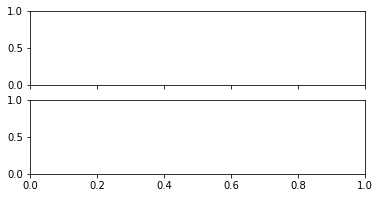

In [ ]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(data.Amount[data.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')



interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use

In [ ]:
from sklearn.preprocessing import StandardScaler
data['scaled_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

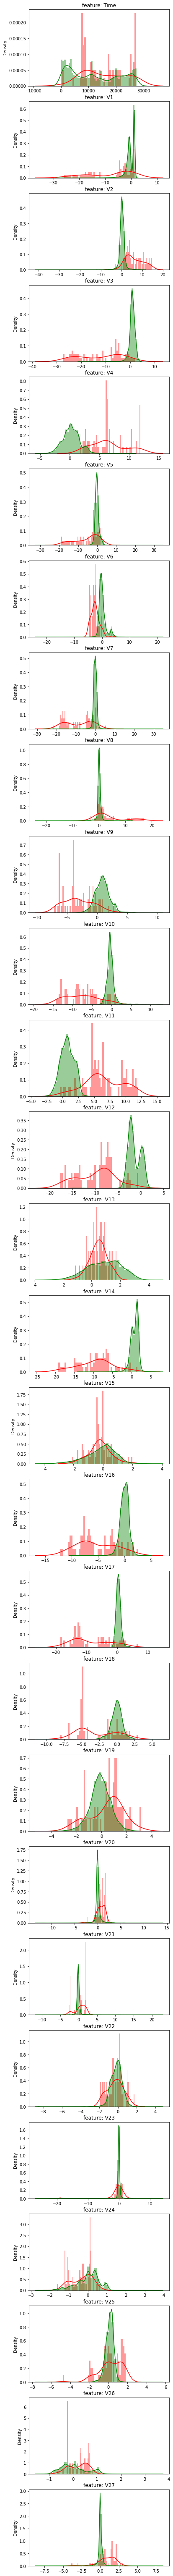

In [ ]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(data[col][data.Class == 1], bins=50, color='r')
    sns.distplot(data[col][data.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()



For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it.


In [ ]:
def split_data(data, drop_list):
    data = data.drop(drop_list,axis=1)
    print(data.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = data['Class'].values #target
    X = data.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

predictions 


Below is funtion to define classifier and get predictions. We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class. There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.


In [ ]:


def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob



In [ ]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))






As I discussed above, some of features have very similar shapes for the two types of transactions, so I belive that dropping them should help to reduce the model complexity and thus increase the classifier sensitivity.

Let us check this with dropping some of the features and checking scores.


In [ ]:


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression



In [ ]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(data, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index([                               'V1',
                                      'V2',
                                      'V3',
                                      'V4',
                                      'V5',
                                      'V6',
                                      'V7',
                                      'V8',
                                      'V9',
                                     'V10',
                                     'V11',
                                     'V12',
                                     'V13',
                                     'V14',
                                     'V15',
                                     'V16',
                                     'V17',
                                     'V18',
                                     'V19',
                                     'V20',
                                     'V21',
                                     'V22',
                                



I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity

In [ ]:
data = data.drop(drop_list,axis=1)
print(data.columns)

Index([                               'V1',
                                      'V2',
                                      'V3',
                                      'V4',
                                      'V5',
                                      'V6',
                                      'V7',
                                      'V8',
                                      'V9',
                                     'V10',
                                     'V11',
                                     'V12',
                                     'V13',
                                     'V14',
                                     'V15',
                                     'V16',
                                     'V17',
                                     'V18',
                                     'V19',
                                     'V20',
                                     'V21',
                                     'V22',
                                

 now we do the predictions with another classifier: logistic regression

My aim is to compare the performance i.e. recall score of GaussianNB() with recall score of logistic regressor for test dataset (which is 20% of full dataset, selected above).

I'll start with running

    default logistic regressor
    for full imbalanced dataset (I know it is a bad approach, but this is just to get rough estimate) 

In [ ]:
# let us check recall score for logistic regression
# Case-LR-1
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[12673    17]
 [   19    39]]
test-set confusion matrix:
 [[3168    5]
 [   6    9]]
recall score:  0.6
precision score:  0.6428571428571429
f1 score:  0.6206896551724138
accuracy score:  0.9965495608531995
ROC AUC: 0.9655846202332178


As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data. So, take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.

In [ ]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(data[data.Class == 1].index)
gen_ind = data[data.Class == 0].index
n_fraud = len(data[data.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_data = data.iloc[under_sample_ind,:]
y_undersample  = undersample_data['Class'].values #target
X_undersample = undersample_data.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_data))
print("% genuine transactions: ",len(undersample_data[undersample_data.Class == 0])/len(undersample_data))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_data))

# transactions in undersampled data:  146
% genuine transactions:  0.5
% fraud transactions:  0.5


In [ ]:
# let us train logistic regression with undersamples data
# Case-LR-2
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_data, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index([                               'V1',
                                      'V2',
                                      'V3',
                                      'V4',
                                      'V5',
                                      'V6',
                                      'V7',
                                      'V8',
                                      'V9',
                                     'V10',
                                     'V11',
                                     'V12',
                                     'V13',
                                     'V14',
                                     'V15',
                                     'V16',
                                     'V17',
                                     'V18',
                                     'V19',
                                     'V20',
                                     'V21',
                                     'V22',
                                



As per expectations, wonderfull performance for completely balanced classes.

Now, let us check its performance for the full skewed dataset. Just to mention: "train" from undersampled data, and "test" on full data.


In [ ]:
# Case-LR-3
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l2')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = data['Class'].values #target
X_full = data.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[15831    32]
 [    6    67]]
recall score:  0.9178082191780822
precision score:  0.6767676767676768




I just want to compare the scores from GaussianNB with logistic-regression.

    get predictions for test-dataset (20% of full dataset) from both models.

Aim is to compare recall score of Case-NB-4 with Case-LR-4.


In [84]:
# Case-LR-4
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[3164    9]
 [   4   11]]
recall score:  0.7333333333333333
precision score:  0.55




So, now I have NB vs LR recall score of 0.878 vs 0.929.

NB confusion matrix:

[[55954 910] [ 12 86]]

LR confusion matrix:

[[53547 3317] [ 7 91]]

Conclusions: Nodoubt, LR gives better model sensitivity, but positive predictive value for NB is more than double (although low for both). As said in introduction, Naive-Bayes is just simple prob. calculator, no coeff. optimization by fitting etc. , so this is quick learner. We can hopefully improve NB's performance by playing around with default threshold on calculated probabilities, but still 89% of fraud cases are detected, bravo NB